## Imports

In [1]:
import numpy as np
from torch.utils.data import DataLoader
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.manifold import TSNE 
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from sklearn.metrics.cluster import adjusted_rand_score

## Download Resources

In [2]:
Fashion_mnist_test_transform = transforms.Compose([transforms.ToTensor()])

testset_Fashion_mnist = datasets.FashionMNIST(root='./data', train=False, download=True, transform=Fashion_mnist_test_transform)

FM_test = DataLoader(testset_Fashion_mnist, batch_size=32, shuffle=False, num_workers=2)
FM_test_images = []
FM_test_labels = []

for batch in FM_test:
    images, labels = batch
    images_flat = images.view(images.shape[0], -1)
    FM_test_images.append(images_flat.numpy())
    FM_test_labels.append(labels.numpy())
FM_test_images = np.vstack(FM_test_images)
FM_test_labels = np.concatenate(FM_test_labels)

X_ = pd.DataFrame(data=FM_test_images) # test data
y_ = pd.Series(data=FM_test_labels) # test label

# Function Definitions

## PCA for dimension reduction

In [3]:
def pca_run(n_components):
  if n_components == 784:
      test_PCA = pd.DataFrame(data = X_)
  else:
      pca = PCA(n_components= n_components)
      test_PCA = pca.fit_transform(X_)
      test_PCA = pd.DataFrame(data = test_PCA)

  return test_PCA

## t-SNE for visualization

In [4]:
def tsne_visualize(X, y):
  X_sample = pd.DataFrame(data=X, index=X.index)
  y_sample = y
  y_sample.name = 'Label'
  y_origin_sample = y_
  y_origin_sample.name = 'Label_origin'
  data = pd.concat((X_sample, y_sample, y_origin_sample), axis=1, join="inner")
  data = data.sample(n=100)
  data = data.reset_index(drop=True)
  X_sample = data.iloc[:, 0:-2].reset_index(drop=True)
  y_sample = data.iloc[:, -2].reset_index(drop=True)
  y_origin_sample = data.iloc[:, -1].reset_index(drop=True)

  n_components = 2
  learning_rate = 300
  perplexity = 30
  early_exaggeration = 12
  init = 'random'

  tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, perplexity=perplexity, early_exaggeration=early_exaggeration, init=init)
  X_tsne = tSNE.fit_transform(X_sample)
  X_tsne = pd.DataFrame(data=X_tsne)
  data_tsne = pd.concat((X_tsne.loc[:,:], y_sample), axis=1, join="inner")
  data_tsne.columns = ["x-axis", "y-axis", "Label"]

  sns.lmplot(x="x-axis", y="y-axis", hue="Label", data=data_tsne, fit_reg=False, height=8)
  plt.title("Clustering Result")
  plt.grid()

  return adjusted_rand_score(y_sample, y_origin_sample)

## other functions

In [5]:
def result_kmeans(X):
  kmeans = KMeans(n_clusters=10)
  kmeans.fit(X)
  return pd.Series(kmeans.labels_)

def result_dbscan(X, min_samples, eps):
  dbscan = DBSCAN(min_samples=min_samples, eps=eps)
  dbscan.fit(X=X)
  score = adjusted_rand_score(y_, pd.Series(dbscan.labels_))
  score = adjusted_rand_score(y_, pd.Series(dbscan.fit_predict(X=X)))
  
  dbscan = DBSCAN(min_samples=min_samples, eps=eps)
  dbscan.fit_predict(X=X)
  return pd.Series(dbscan.labels_)

In [6]:
def run_kmeans(dimension):
  X_pca = pca_run(dimension)
  y_kmean = result_kmeans(X=X_)
  score = tsne_visualize(X_pca, y_kmean)
  print(f"KMeans ARI : {score}")
  return score

def run_dbscan(dimension, min_samples, eps):
  X_pca = pca_run(dimension)
  y_dbscan = result_dbscan(X=X_, min_samples=min_samples, eps=eps)
  score = tsne_visualize(X_pca, y_dbscan)
  print(f"DBSCAN ARI : {score}")
  return score

# Execution

In [7]:
aris = [[],[]]

## Dimension 10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans ARI : 0.34438451446302504


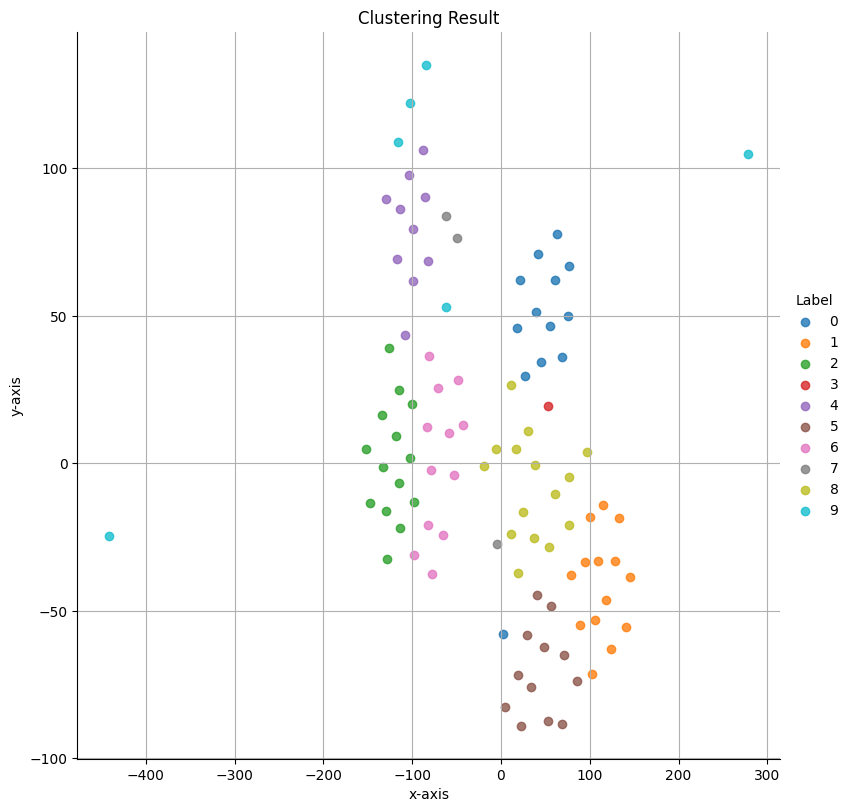

In [8]:
ari = run_kmeans(dimension=10)
aris[0].append(ari)

DBSCAN ARI : 0.046761342070787526


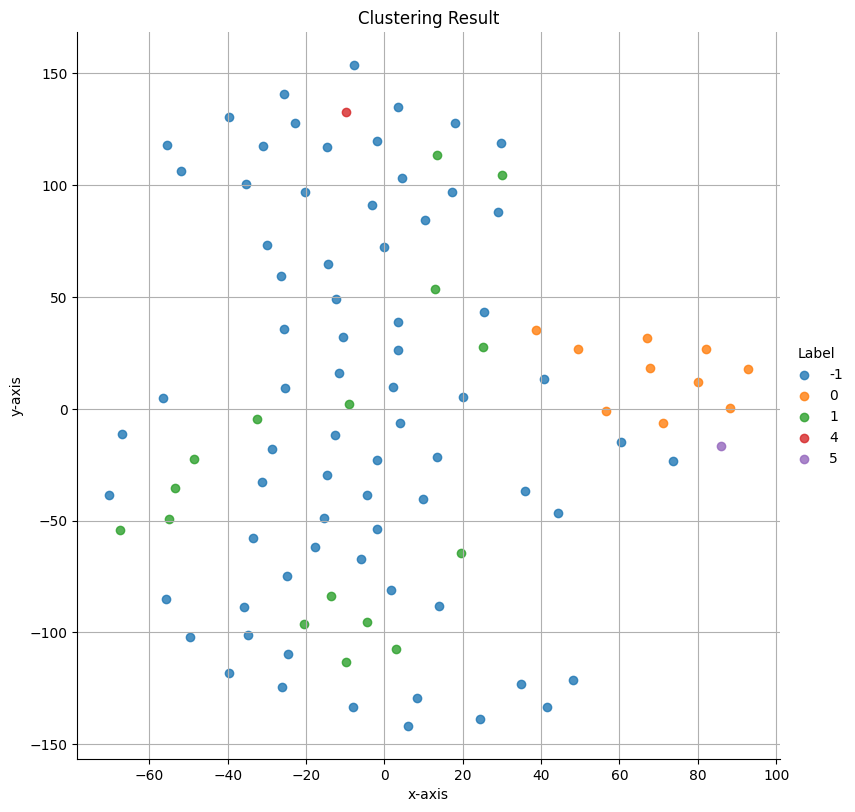

In [9]:
ari = run_dbscan(dimension=10, min_samples=12, eps=3.8)
aris[1].append(ari)

## Dimension 50

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans ARI : 0.40184566070455646


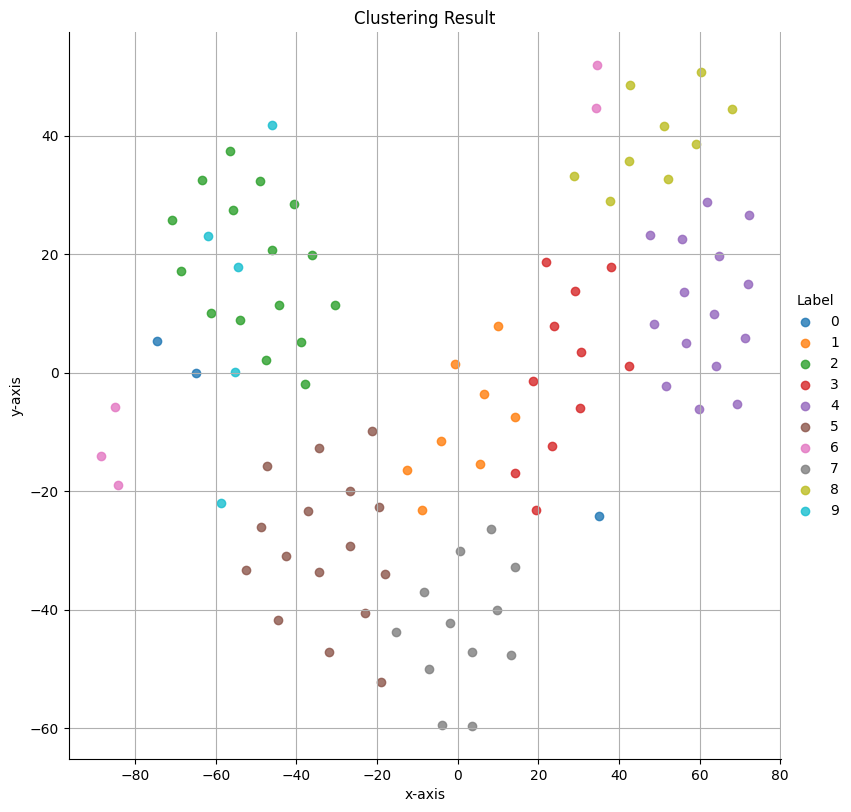

In [10]:
ari = run_kmeans(dimension=50)
aris[0].append(ari)

DBSCAN ARI : 0.08387782802707101


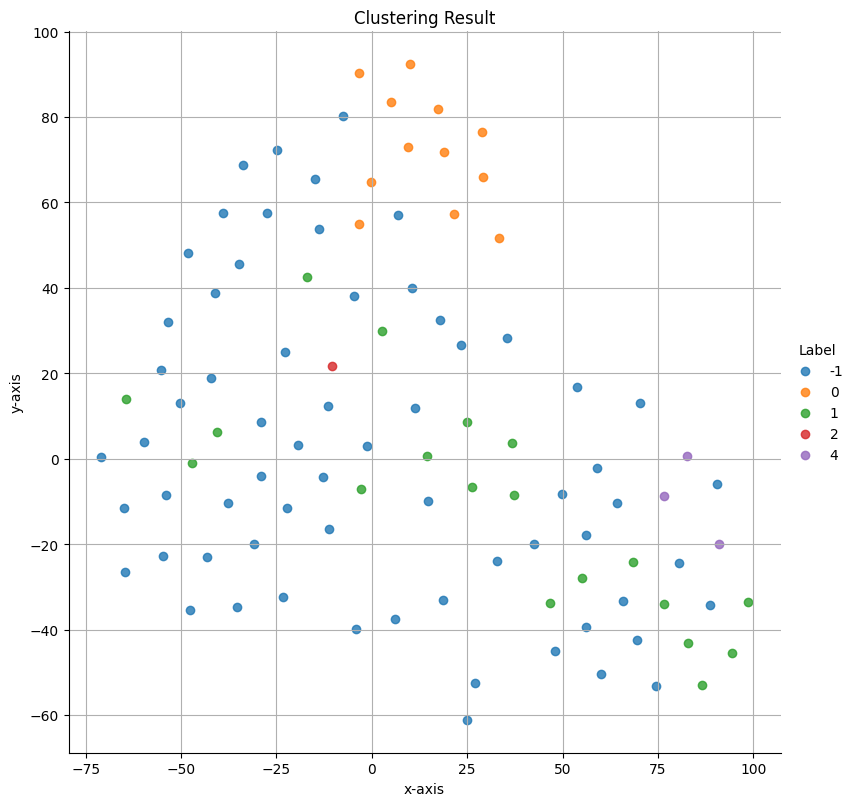

In [11]:
ari = run_dbscan(dimension=50, min_samples=12, eps=3.8)
aris[1].append(ari)

## Dimension 100

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans ARI : 0.34343831165280814


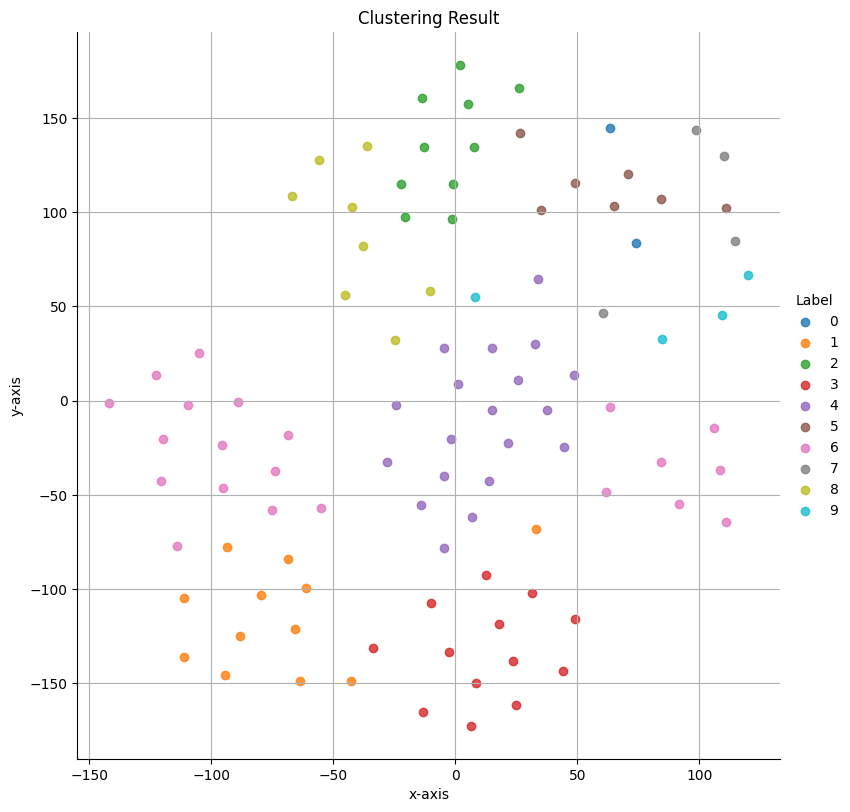

In [12]:
ari = run_kmeans(dimension=100)
aris[0].append(ari)

DBSCAN ARI : 0.04099337687015552


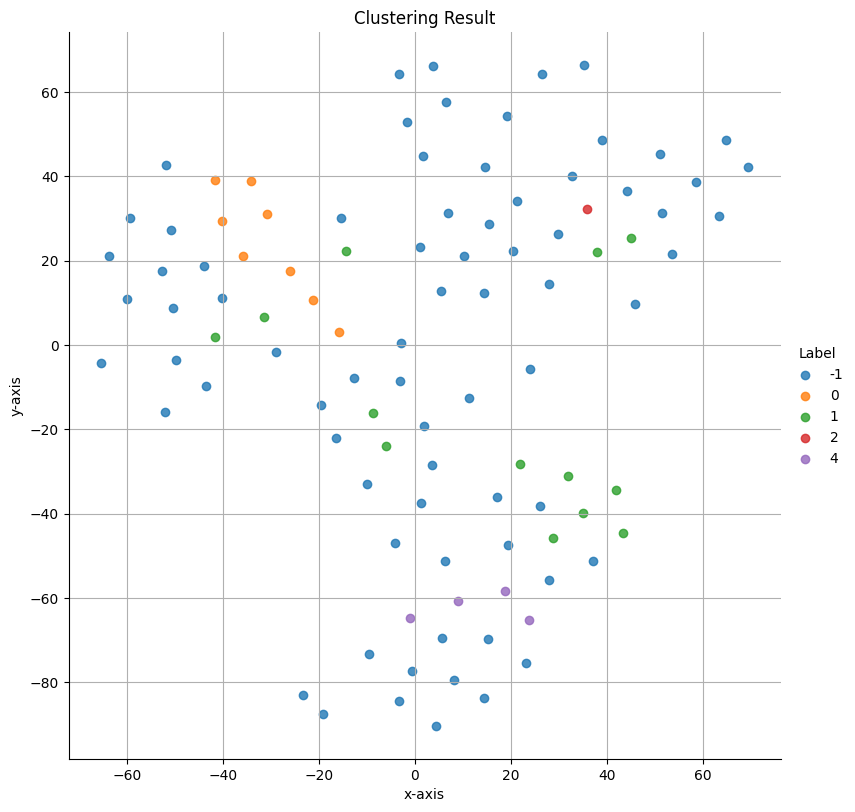

In [13]:
ari = run_dbscan(dimension=100, min_samples=12, eps=3.8)
aris[1].append(ari)

## Dimension 784

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans ARI : 0.48558586921502306


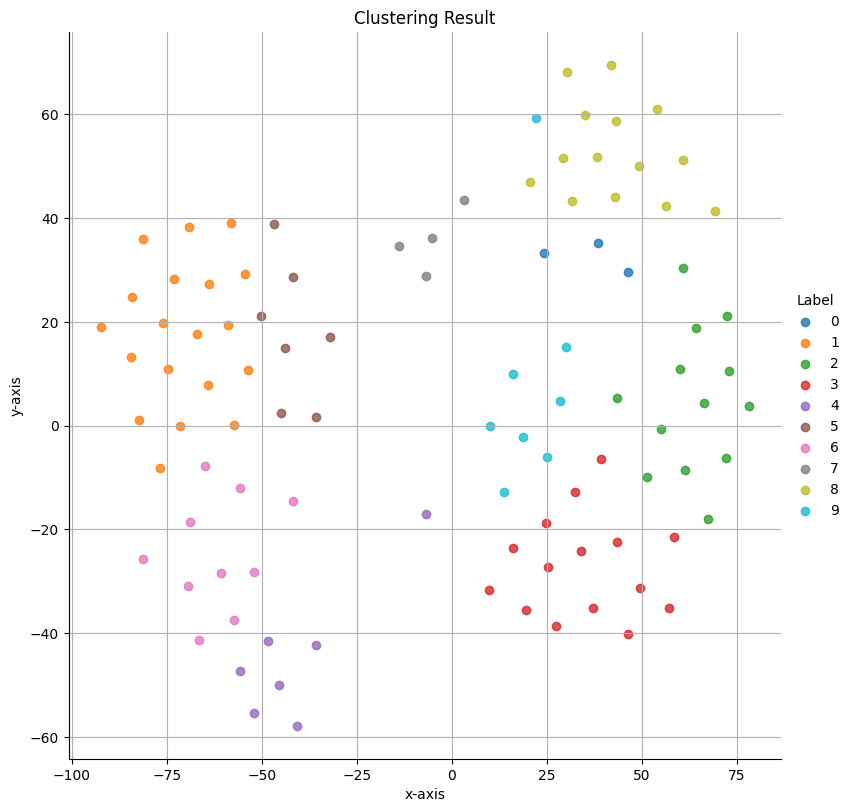

In [14]:
ari = run_kmeans(dimension=784)
aris[0].append(ari)

DBSCAN ARI : 0.04880759290928534


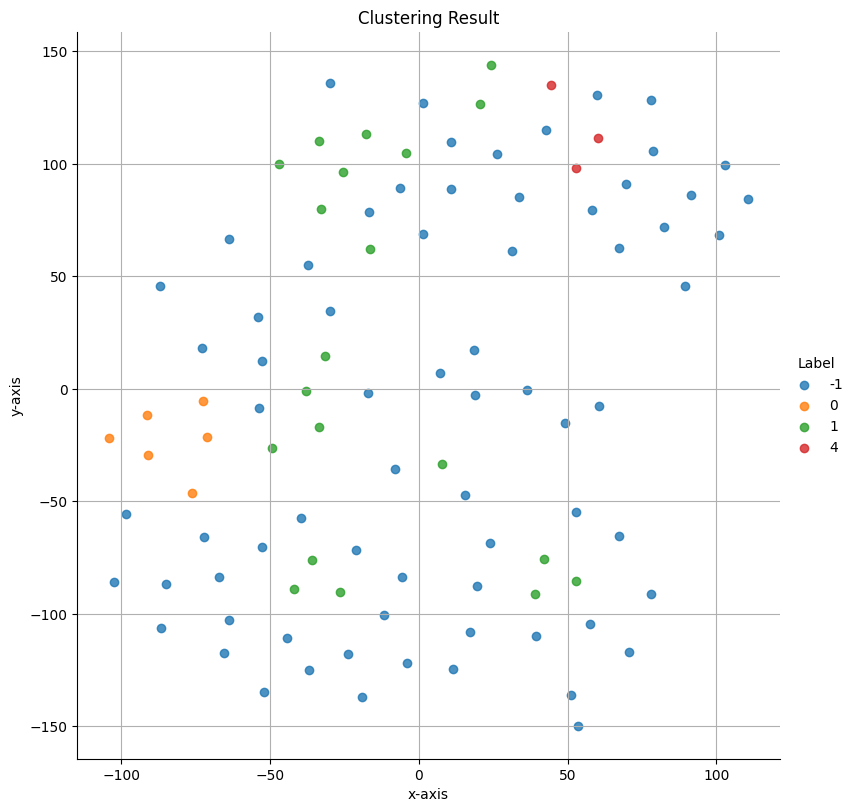

In [15]:
ari = run_dbscan(dimension=784, min_samples=12, eps=3.8)
aris[1].append(ari)

## ARI scores

In [16]:
_aris = pd.DataFrame(aris)
_aris.columns = [10, 50, 100, 784]
print(_aris)

        10        50        100       784
0  0.344385  0.401846  0.343438  0.485586
1  0.046761  0.083878  0.040993  0.048808
